<a href="https://colab.research.google.com/github/ferbator/data-engineering/blob/main/M33071_%D0%9A%D0%B0%D1%80%D0%B5%D0%BF%D0%B8%D0%BD_%22lab2%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание 0


Для всех  заданий будем использовать обезличенные транзакционные банковские данные. Для этого считайте в переменные **tr_mcc_codes, tr_types, transactions и gender_train** из одноимённых таблиц из папки [data](https://drive.google.com/drive/folders/1YAMe7MiTxA-RSSd8Ex2p-L0Dspe6Gs4L). 

Для таблицы transactions используйте только первые n=1000000 строк. При чтении файлов обратите внимание на разделители внутри каждого из файлов - они могут различаться!

###  Описание данных
#### Таблица ```transactions.csv```
##### Описание
Таблица содержит историю транзакций клиентов банка за один год и три месяца.

##### Формат данных

```
customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
111111,15 01:40:52,1111,1000,-5224,111111
111112,15 15:18:32,3333,2000,-100,11122233
...
```
##### Описание полей

 - ```customer_id``` — идентификатор клиента;
 - ```tr_datetime``` — день и время совершения транзакции (дни нумеруются с начала данных);
 - ```mcc_code``` — mcc-код транзакции;
 - ```tr_type``` — тип транзакции;
 - ```amount``` — сумма транзакции в условных единицах со знаком; ```+``` — начисление средств клиенту (приходная транзакция), ```-``` — списание средств (расходная транзакция);
 - ```term_id``` — идентификатор терминала;


#### Таблица ```gender_train.csv```

##### Описание
Данная таблица содержит информацию по полу для части клиентов, для которых он известен. Для остальных клиентов пол неизвестен.

##### Формат данных
```
customer_id,gender
111111,0
111112,1
...
```

##### Описание полей
 - ```customer_id``` — идентификатор клиента;
 - ```gender``` — пол клиента;

### Таблица ```tr_mcc_codes.csv```

##### Описание
Данная таблица содержит описание mcc-кодов транзакций.

##### Формат данных
```
mcc_code;mcc_description
1000;словесное описание mcc-кода 1000
2000;словесное описание mcc-кода 2000
...
```

##### Описание полей
 - ```mcc_code``` – mcc-код транзакции;
 - ```mcc_description``` — описание mcc-кода транзакции.

#### Таблица ```tr_types.csv```

##### Описание
Данная таблица содержит описание типов транзакций.

##### Формат данных
```
tr_type;tr_description
1000;словесное описание типа транзакции 1000
2000;словесное описание типа транзакции 2000
...
```

##### Описание полей
 - ```tr_type``` – тип транзакции;
 - ```tr_description``` — описание типа транзакции;


Задания 1-4 делаются без использования merge!

## Задание 1



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tr_mcc_codes = pd.read_csv("drive/MyDrive/ML/data/tr_mcc_codes.csv", sep=";")
tr_types = pd.read_csv("drive/MyDrive/ML/data/tr_types.csv", sep = ';')
transactions = pd.read_csv("drive/MyDrive/ML/data/transactions.csv", nrows=1000000)
gender_train = pd.read_csv("drive/MyDrive/ML/data/gender_train.csv")

1. Для столбца tr_type датафрейма transactions выберите произвольные 1000 строк с помощью метода sample
2. В полученной на предыдущем этапе подвыборке найдите долю транзакций (стобец tr_description в датасете tr_types), в которой содержится подстрока 'POS' или 'ATM'


### 1.1

In [ ]:
sample1000 = transactions['tr_type'].sample(1000)
sample1000

27193     2010
187939    2370
287133    1030
46098     2010
641603    1100
          ... 
292068    1010
975951    1030
704417    2370
701545    2370
622004    2010
Name: tr_type, Length: 1000, dtype: int64

### 1.2

In [ ]:
count = 0
for id in sample1000.values:
  for row in tr_types.itertuples():
    if row.tr_type == id and (row.tr_description.find('POS') != -1 or row.tr_description.find('АТМ') != -1):
      count += 1

print(count/1000)

0.607


## Задание 2 


1. Для столбца tr_type датафрейма transactions посчитайте частоту встречаемости всех типов транзакций tr_type в transactions.
2. Выведите топ-10 транзакций по частоте встречаемости (вывести для них tr_description тоже).

### 2.1

In [ ]:
groups = transactions.groupby(['tr_type']).size().sort_values(ascending=False)/10**6
groups

tr_type
1010    0.231117
2010    0.151166
7070    0.149006
1110    0.137658
1030    0.118975
          ...   
4061    0.000004
2341    0.000004
8146    0.000003
8100    0.000002
1510    0.000002
Length: 67, dtype: float64

### 2.2

In [ ]:
df = tr_types[tr_types['tr_type'].isin(groups.head(10).index)]
df['frequency'] = groups[df['tr_type']].values
df.sort_values(['frequency'], ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tr_type,tr_description,frequency
98,1010,Покупка. POS ТУ СБ РФ,0.231117
106,2010,Выдача наличных в АТМ Сбербанк России,0.151166
59,7070,Перевод на карту (с карты) через Мобильный бан...,0.149006
101,1110,Покупка. POS ТУ Россия,0.137658
99,1030,Оплата услуги. Банкоматы СБ РФ,0.118975
129,2370,Списание с карты на карту по операции <перевод...,0.049830
39,7010,Взнос наличных через АТМ (в своем тер.банке),0.028972
47,7030,Перевод на карту (с карты) через АТМ (в предел...,0.026078
60,7071,Перевод на карту (с карты) через Мобильный бан...,0.015781
100,1100,Покупка. ТУ Россия,0.015476


## Задание 3
1. В датафрейме transactions найдите клиента с максимальной суммой приходов на карту
2. В датафрейме transactions найдите клиента с максимальной суммой расходов по карте
3. Найдите модуль разницы для этих клиентов между суммой расходов и суммой приходов

### 3.1

In [ ]:
max = transactions[transactions['amount'] > 0].groupby(['customer_id']).sum()
customer1 = max[max['amount'] == max['amount'].max()]
customer1

,mcc_code,tr_type,amount
customer_id,,,
70780820,530700254,623691441,1.248115e+09


### 3.2

In [ ]:
min = transactions[transactions['amount'] < 0].groupby(['customer_id']).sum()
customer2 = min[min['amount'] == min['amount'].min()]
customer2

,mcc_code,tr_type,amount
customer_id,,,
70780820,2686385,1093690,-1.249952e+09


### 3.3

In [ ]:
print(np.abs(np.abs(customer2['amount']) - customer1['amount']))

customer_id
70780820    1837317.98
Name: amount, dtype: float64


## Задание 4
1. Найдите среднее арифметическое и медиану по amount по всем типам транзакций из топ 10 из задания 2
1. Найдите среднее арифметическое и медиану по amount по всем типам транзакций для клиентов из задания 3

### 4.1

In [ ]:
transactions[transactions['tr_type'].isin(head10)].sort_values(by = ['tr_type']).groupby(['tr_type'])['amount'].mean()

tr_type
1010    -19784.748640
1030     -5320.980222
1100    -44061.827262
1110    -32119.330371
2010   -136077.629325
2370   -205418.249032
7010    276391.789596
7030     86104.332909
7070     65569.831700
7071     66806.826623
Name: amount, dtype: float64

In [ ]:
transactions[transactions['tr_type'].isin(head10)].sort_values(by = ['tr_type']).groupby(['tr_type'])['amount'].median()

tr_type
1010     -7411.52
1030     -2245.92
1100    -10188.26
1110    -11207.57
2010    -44918.32
2370    -44918.32
7010    112295.79
7030     13951.52
7070     11319.42
7071      3593.47
Name: amount, dtype: float64

### 4.2


In [ ]:
transactions.query('customer_id == @customer1.index').groupby(['tr_type'])['amount'].mean()

tr_type
2010   -2.941056e+06
2330   -2.382398e+06
2370   -2.218505e+06
6110    1.756293e+04
7020    1.465129e+04
7021    2.850067e+04
7030    1.406196e+04
7031    1.921036e+04
7034    1.430648e+04
7040    2.153833e+04
7070    1.384821e+04
7071    1.860057e+04
7074    2.281159e+04
Name: amount, dtype: float64

In [ ]:
transactions.query('customer_id == @customer1.index').groupby(['tr_type'])['amount'].median()

tr_type
2010   -3368873.660
2330   -2245915.770
2370   -2245915.770
6110      10028.010
7020      10319.985
7021      28500.670
7030       8848.910
7031      12992.620
7034      14306.480
7040      14396.320
7070       8714.150
7071      12543.440
7074       9387.930
Name: amount, dtype: float64

## Подготовка для заданий 5-8

*Из заданий 5-8 нужно выполнить минимум два любых*

Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [ ]:
transactions = pd.merge(transactions, gender_train, how='left')
transactions = pd.merge(transactions, tr_mcc_codes, how='inner')
transactions = pd.merge(transactions, tr_types, how='inner')
transactions.shape

(999584, 9)

## Задание 5

1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount).
2. Определите модуль разницы между средними поступлениями у мужчин и женщин

Обратите внимание, что для вычисления модуля разности точных знаний о том, 
какой класc относится к мужчинам, а какой - к женщинам, не требуется.

### 5.1

In [ ]:
mean_expenses = transactions[transactions['amount'] < 0].groupby(['gender'])['amount'].mean()
np.abs(mean_expenses[0]-mean_expenses[1])

32718.054920224655

### 5.2

In [ ]:
mean_income = transactions[transactions['amount'] > 0].groupby(['gender'])['amount'].mean()
mean_income[0]-mean_income[1]

63366.57104801464

## Задание 8

1. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
2. Посчитайте количество транзакций с amount<0 в ночное время для мужчин и женщин. Ночное время - это примерно 00-06 часов. 

In [ ]:
transactions[transactions.tr_datetime
             .apply(
                 lambda x: x.split(':')[0][-2:] in ['00', '01', '02', '03', '04', '05', '06']
                 )][transactions['amount'] < 0].groupby(['gender']).size()

<ipython-input-9-9ac2bada9c8f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  transactions[transactions.tr_datetime


gender
0.0    43510
1.0    46694
dtype: int64

### Дополнительное задание

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
transactions[transactions.tr_datetime
             .apply(
                 lambda x: x.split(':')[0][-2:] in ['00', '01', '02', '03', '04', '05', '06']
                 )].query("amount < 0").groupby(['gender','mcc_description'])['amount'].sum()

gender  mcc_description                                           
0.0     Авиалинии, авиакомпании                                      -29489206.95
        Авиалинии, авиакомпании, нигде более не классифицированные   -29445925.02
        Автобусные линии                                              -2778697.76
        Автозапчасти и аксессуары                                     -3964033.26
        Автоматизированные бензозаправки                                -73355.43
                                                                         ...     
1.0     Центры здоровья                                               -1875553.00
        Цифровые товары, игры                                           -68723.90
        Школы — бизнес и секретарей                                     -13475.49
        Штрафы                                                         -988205.17
        Электрические части и оборудование                            -1216842.34
Name: amount, Length: 343, dtyp

In [ ]:
transactions[transactions['gender'] == 0][]

In [ ]:
zero = transactions[transactions['gender'] == 0][transactions['amount'] < 0][['tr_datetime', 'amount']].groupby(
    by=[transactions.tr_datetime.map(lambda x : x.split(':')[0][-2:])])['amount'].mean().head(7)
zero

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


tr_datetime
00   -39419.824141
01   -78194.014973
02   -41751.189116
03   -48458.780602
04   -50515.319139
05   -57217.050840
06   -51540.499857
Name: amount, dtype: float64

In [ ]:
one = transactions[transactions['gender'] == 1][transactions['amount'] < 0][['tr_datetime', 'amount']].groupby(
    by=[transactions.tr_datetime.map(lambda x : x.split(':')[0][-2:])])['amount'].mean().head(7)
one

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


tr_datetime
00    -44925.588430
01    -72159.638872
02   -111034.279468
03   -142396.760882
04   -168727.721598
05   -135666.448762
06   -124681.409075
Name: amount, dtype: float64

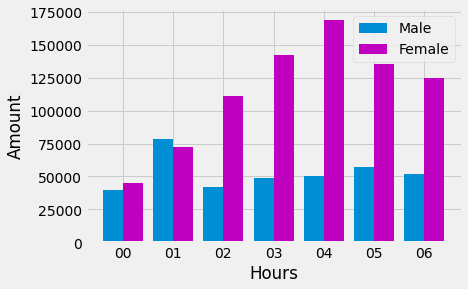

In [ ]:
X = ['00','01','02','03', '04', '05', '06']
male = np.abs(zero.values) 
female = np.abs(one.values)

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female, 0.4, label = 'Female', color='m')
  
plt.xticks(X_axis, X)
plt.xlabel("Hours")
plt.ylabel("Amount")
plt.legend()
plt.show()